<a href="https://colab.research.google.com/github/vijaytamilselvan/ml-classification-regression/blob/main/evaluation_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of X: (100, 2)
Shape of y: (100, 1)
Epoch 0, Loss: 39927.29
Epoch 100, Loss: 591.93
Epoch 200, Loss: 591.82
Epoch 300, Loss: 591.80
Epoch 400, Loss: 591.79
Epoch 500, Loss: 591.79
Epoch 600, Loss: 591.79
Epoch 700, Loss: 591.79
Epoch 800, Loss: 591.78
Epoch 900, Loss: 591.78
Final Weights (Bias, TV, Radio): [0.55205704 2.93314601 1.90007604]


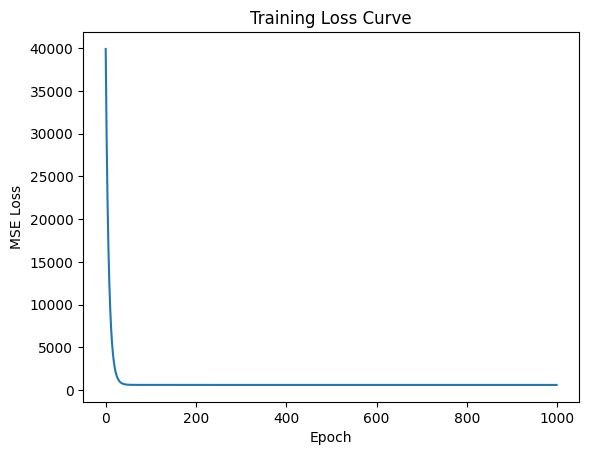

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n_samples = 100

# Features
#Used TV and radio as features here.

TV = np.random.uniform(0, 100, n_samples)   # TV ad spend
Radio = np.random.uniform(0, 50, n_samples) # Radio ad spend


# True relationship: Sales = 3*TV + 1.5*Radio + 5 + noise
noise = np.random.normal(0, 25, n_samples)
Sales = 3*TV + 1.5*Radio + 5 + noise

# Prepare features (n_samples x 2) and target (n_samples x 1)
X = np.column_stack((TV, Radio))       # shape (100,2) - Stacking the input column wise
y = Sales.reshape(-1, 1)               # shape (100,1)

print("Shape of X:", X.shape)  # (100,2)
print("Shape of y:", y.shape)  # (100,1)

# -------------------------------
# 2. Add bias term (X -> [1, TV, Radio])
# -------------------------------
X_b = np.c_[np.ones((n_samples, 1)), X]  # shape (100,3) - Adding boas column of 1's as the first column

# -------------------------------
# 3. Initialize Parameters
# -------------------------------
np.random.seed(42)
w = np.random.randn(3, 1)  # weights (bias + 2 features)

# -------------------------------
# 4. Define Hypothesis, Loss, Gradients
# -------------------------------

# Hypothesis: y_pred = Xw
def predict(X, w):
    return X.dot(w)

# Mean Squared Error (MSE)
def compute_loss(y, y_pred):
    return np.mean((y_pred - y) ** 2)

# Gradients
def compute_gradients(X, y, y_pred):
    n = len(y)
    dw = (2/n) * X.T.dot(y_pred - y)   # derivative wrt weights
    return dw

# -------------------------------
# 5. Training with Gradient Descent
# -------------------------------
learning_rate = 1e-5
n_epochs = 1000

losses = []

for epoch in range(n_epochs):
    y_pred = predict(X_b, w)
    loss = compute_loss(y, y_pred)
    dw = compute_gradients(X_b, y, y_pred)

    # update weights
    w -= learning_rate * dw

    losses.append(loss)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.2f}")

# -------------------------------
# 6. Results
# -------------------------------
print("Final Weights (Bias, TV, Radio):", w.ravel())

plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()


In [4]:
y_pred = X_b.dot(w)  # X_b includes bias term
print("First 10 predictions:", y_pred[:10].flatten())
print("First 10 actual:", y[:10].flatten())


First 10 predictions: [113.39603457 339.87185277 245.12158111 224.46348042 132.53686766
  69.99123701  56.57676643 326.39439798 198.60456224 215.55346655]
First 10 actual: [102.71860654 343.7514152  255.50169296 204.88156165 166.51744046
  82.34109631  23.42121545 337.93301934 178.12732418 242.87238167]


In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = X_b.dot(w)

# Metrics
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 591.7838916676335
R² Score: 0.9312663615467863


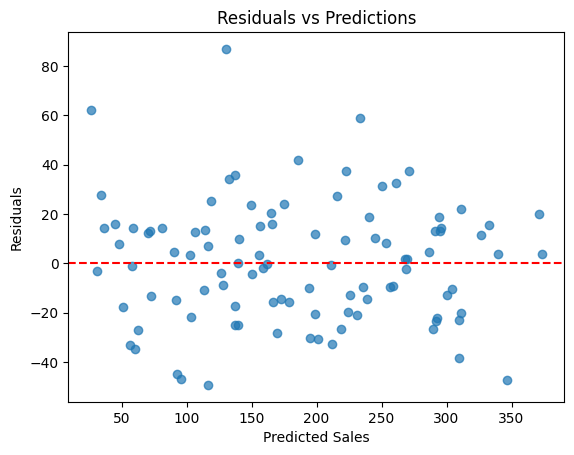

In [6]:
residuals = y - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residuals vs Predictions")
plt.show()


In [1]:
!git clone https://github.com/vijaytamilselvan/ml-classification-regression


Cloning into 'ml-classification-regression'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 26 (delta 10), reused 4 (delta 1), pack-reused 0 (from 0)
Receiving objects: 100% (26/26), 9.75 KiB | 9.75 MiB/s, done.
Resolving deltas: 100% (10/10), done.


cd ml-classification-regression
git add evaluation_metrics.ipynb
git commit -m "added evaluation_metrics notebook"
git push origin main


In [4]:
!mv evaluation_metrics.ipynb ml-classification-regression/


mv: cannot stat 'evaluation_metrics.ipynb': No such file or directory


SyntaxError: invalid syntax (ipython-input-2885199924.py, line 1)

In [6]:
!mv evaluation_metrics.ipynb ml-classification-regression/


mv: cannot stat 'evaluation_metrics.ipynb': No such file or directory
